# Ejercicio 6.7

A continuación se muestra el código de la función Laplaciand2Dd(n) que regresa una matriz de orden $n^2$ 

## Solución 3 a)

In [1]:
import numpy as np

def Laplacian2dD(n):
    """
    Esta función calcula la matriz laplaciana de dos dimensiones.
    
    Argumentos:
    n (entero positivo): número de puntos internos de la malla
    
    Salida:
    A(matriz cuadra): Matriz de rala (n^2)x(n^2)
    """
    #Rellenamos la matriz con cuatros en la diagonal y lo demás con ceros
    A = 4*(np.identity(n*n))
    for i in range(n*n):
        for j in range(n*n):
            #Generamos los menos unos de la matriz B 
            if (j==i-1 and (j+1)%n != 0) or (j==i+1 and j%n != 0):
                A[i][j] = -1
            #Generamos los menos unos restantes de la formula de 5 puntos
            elif (j == i + n  or j == i - n):
                A[i][j] = -1
    #Por último dividimos entre h^2 donde h=1/n+1
    A = np.dot(A,(n+1)**2)
    return A

La siguiente función regresa la función f evaluada enlos puntos donde ueremos hallar las aproximaciones

## Solución 3 b) 

In [2]:
def funcion(x,y):
    #Regresa la función que queramos evaluar en el punto (x,y):
    return x + y

A continuación se muestrá el código de la función Laplacian2dDRHS(n,f)

In [4]:
import numpy as np

def funcion(x,y):
    #Regresa la función que queramos evaluar en el punto (x,y):
    return x + y

def Laplacian2dDRHS(n,f=funcion):
    """
    Esta función regresa la función en los puntos x,y 
    de la partición para resolver la ecuación de Laplace
    """
    #Generamos los puntos de la partición para x e y 
    x, y, z =[], [], []
    for j in range(1, n+1):
        x.append(j/(n+1))
        y.append(j/(n+1))
    #Evaluamos la función en los puntos x[i] y y[j]
    for i in range(n):
        for j in range(n):
            z.append(f(x[i],y[j]))
    return z

# Ejercicio 6.8

Sea A la matriz definida por A = Laplacian2dD (5), y A = LU su factorización LU dada por LUFacto. Utilice la función spy para mostrar las matrices L y U.

## Solución 

El código de la factorización LU es el siguiente.

In [5]:
import numpy as np
def LUfacto(A):
    """
    Esta funcion devuelve las matrices L, U,, las cuales
    son la facotrizacion de A (A = LU). Donde L es una 
    matriz triangular inferior y U es triangular superior.
    
    Argumentos:
    A(matriz): Matriz que se desea factorizar

    Excepciones:
    Division entre cero si U[j][j] =0 
    """
    # Hallamaos la dimension de la matriz
    n = A.shape[0]
    #Creamos la matriz U compuesta por ceros
    U = np.zeros((n,n))
    #La matriz L tendra unos en su diagonal
    L = np.identity(n)
    #La primera fila de U será igual a la primera fila de A
    U[0] = A[0]
    #Verificamos que no intentemos una división entre cero
    if A[0][0] == 0:
        print("Error de ejecución: División entre cero")
        return 
    else:
        #Hallamos la primera columna de L
        L[:,0] = A[:,0]/A[0][0]
        #Este ciclo recorrerá las filas i
        for i in range(1,n):
            #El siguiente ciclo recorrerá las columasn j
            for j in range(1,n):
                #Si la siguiente condición se cumple entonces llenaremos la matriz L
                if i>j:
                    suma = 0
                    for k in range(j):
                        suma += L[i][k]*U[k][j]  
                    if U[j][j] == 0:
                        print("Error de ejecución: Divisi{on entre cero")
                        return 
                    else:
                        L[i][j] = (A[i][j] - suma)/U[j][j]
                #Si i >= j entonces se llenará la matriz U
                else:
                    suma = 0
                    for k in range(i):
                        suma += L[i][k]*U[k][j]
                    U[i][j] = A[i][j] - suma
    return (L,U)

A = Laplacian2dD(5)
L,U = LUfacto(A)

Utilicemos la función spy para visualizar la factorización.

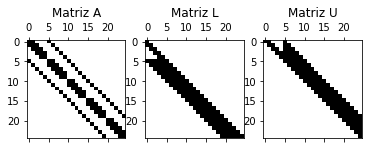

In [7]:
import matplotlib.pyplot as plt

#HALLAMOS LAS MATRICES A, L Y U.
A = Laplacian2dD(5)
L,U = LUfacto(A)

#MATRIZ A
plt.subplot(1,3,1)
plt.spy(A) 
plt.title('Matriz A')
#MATRIZ L
plt.subplot(1,3,2)
plt.spy(L) 
plt.title('Matriz L')
#MATRIZ U
plt.subplot(1,3,3)
plt.spy(U) 
plt.title('Matriz U')

plt.show()